In [246]:
# LIBRARIES #
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import io
import sklearn
import sklearn.metrics  as metrics
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, KFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [247]:
# READ CSV #
warnings.filterwarnings('ignore')
data = pd.read_csv('/content/student-por.csv', sep=",")

In [248]:
# FIRST APPROACH TO THE DATASET #

# columns names #
data_names = ['school', 'sex', 'age', 'address', 'family_size', 'parent_cohabition_status', 'mother_education', 'father_education','mother_job', 'father_job', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'school_support', 'family_support', 'paid', 'extra_curricular_activities', 'nursery', 'higher', 'internet_access', 'romantic', 'famrel', 'freetime', 'going_out', 'workday_alcohol', 'weekend_alcohol', 'health', 'absences','grade_period1', 'grade_period2', 'final_grade' ]
data.columns = data_names

# numerical vs categorical columns #
numerical_columns = ['age', 'mother_education', 'father_education', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'going_out', 'workday_alcohol', 'weekend_alcohol', 'health', 'absences', 'grade_period1','grade_period2', 'final_grade']
categorical_columns = ["school","sex",'address', 'family_size', 'parent_cohabition_status','mother_job', 'father_job', 'reason', 'guardian',"school_support", "family_support",'paid', 'extra_curricular_activities', 'nursery', 'higher', 'internet_access', 'romantic']


In [249]:
data.describe()

,age,mother_education,father_education,traveltime,studytime,failures,famrel,freetime,going_out,workday_alcohol,weekend_alcohol,health,absences,grade_period1,grade_period2,final_grade
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [250]:
# CLEAN THE DATABASE # 

# 1. Drop the columns that we are not going to use.
data_clean = data.drop(['grade_period1', 'grade_period2'], axis=1)
numerical_columns = ['age', 'mother_education', 'father_education', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'going_out', 'workday_alcohol', 'weekend_alcohol', 'health', 'absences', 'final_grade']

In [251]:
# CLEAN THE DATABASE # 

# 3. Get the dummies so that it is easier to work. 
# This is, transform the categorical columns into numerical ones. 
data_clean = pd.get_dummies(data, columns=categorical_columns)

# 4. Transform the data. 
# we need to standarize the data to take into consideration variations in measurments, units and scales. 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_columns])
scaled_dataframe = pd.DataFrame(scaled_data, columns = numerical_columns)  
scaled_dataframe.head()

for column in numerical_columns:
  data_clean.append(scaled_dataframe[column])
  data_clean[column] = scaled_dataframe[column]

In [252]:
corr = data_clean.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,age,mother_education,father_education,traveltime,studytime,failures,famrel,freetime,going_out,workday_alcohol,weekend_alcohol,health,absences,grade_period1,grade_period2,final_grade,school_GP,school_MS,sex_F,sex_M,address_R,address_U,family_size_GT3,family_size_LE3,parent_cohabition_status_A,parent_cohabition_status_T,mother_job_at_home,mother_job_health,mother_job_other,mother_job_services,mother_job_teacher,father_job_at_home,father_job_health,father_job_other,father_job_services,father_job_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,school_support_no,school_support_yes,family_support_no,family_support_yes,paid_no,paid_yes,extra_curricular_activities_no,extra_curricular_activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_access_no,internet_access_yes,romantic_no,romantic_yes
age,1.00,-0.11,-0.12,0.03,-0.01,0.32,-0.02,-0.00,0.11,0.13,0.09,-0.01,0.15,-0.17,-0.11,-0.11,-0.09,0.09,0.04,-0.04,0.03,-0.03,0.00,-0.00,0.01,-0.01,0.09,-0.10,0.04,-0.03,-0.05,0.06,-0.10,0.06,-0.02,-0.05,0.03,-0.01,-0.01,-0.02,-0.14,-0.05,0.33,0.17,-0.17,0.10,-0.10,0.01,-0.01,0.05,-0.05,0.02,-0.02,0.27,-0.27,-0.01,0.01,-0.18,0.18
mother_education,-0.11,1.00,0.65,-0.27,0.10,-0.17,0.02,-0.02,0.01,-0.01,-0.02,0.00,-0.01,0.26,0.26,0.24,0.25,-0.25,-0.12,0.12,-0.19,0.19,0.01,-0.01,0.06,-0.06,-0.38,0.26,-0.22,0.13,0.45,-0.10,0.16,-0.12,-0.01,0.26,-0.12,0.04,-0.03,0.13,-0.04,0.09,-0.10,0.02,-0.02,-0.12,0.12,-0.11,0.11,-0.12,0.12,-0.13,0.13,-0.21,0.21,-0.27,0.27,0.03,-0.03
father_education,-0.12,0.65,1.00,-0.21,0.05,-0.17,0.02,0.01,0.03,0.00,0.04,0.04,0.03,0.22,0.23,0.21,0.21,-0.21,-0.08,0.08,-0.14,0.14,0.04,-0.04,0.03,-0.03,-0.20,0.14,-0.20,0.10,0.31,-0.11,0.23,-0.22,0.03,0.35,-0.07,0.02,-0.03,0.09,0.09,-0.04,-0.07,-0.02,0.02,-0.14,0.14,-0.09,0.09,-0.08,0.08,-0.07,0.07,-0.19,0.19,-0.18,0.18,0.07,-0.07
traveltime,0.03,-0.27,-0.21,1.00,-0.06,0.10,-0.01,0.00,0.06,0.09,0.06,-0.05,-0.01,-0.15,-0.15,-0.13,-0.25,0.25,-0.04,0.04,0.34,-0.34,-0.01,0.01,-0.04,0.04,0.17,-0.10,0.03,-0.07,-0.10,-0.04,-0.09,0.10,-0.03,-0.04,0.13,-0.13,0.06,-0.08,0.02,-0.07,0.09,0.04,-0.04,0.04,-0.04,0.04,-0.04,0.03,-0.03,0.01,-0.01,0.07,-0.07,0.19,-0.19,-0.00,0.00
studytime,-0.01,0.10,0.05,-0.06,1.00,-0.15,-0.00,-0.07,-0.08,-0.14,-0.21,-0.06,-0.12,0.26,0.24,0.25,0.14,-0.14,0.21,-0.21,-0.06,0.06,0.01,-0.01,0.01,-0.01,-0.04,-0.02,-0.00,0.03,0.04,-0.01,0.10,-0.04,0.01,-0.02,-0.08,-0.01,-0.09,0.18,0.02,-0.02,0.01,-0.09,0.09,-0.14,0.14,0.00,-0.00,-0.07,0.07,-0.04,0.04,-0.19,0.19,-0.04,0.04,-0.03,0.03
failures,0.32,-0.17,-0.17,0.10,-0.15,1.00,-0.06,0.11,0.05,0.11,0.08,0.04,0.12,-0.38,-0.39,-0.39,-0.11,0.11,-0.07,0.07,0.06,-0.06,0.07,-0.07,0.01,-0.01,0.10,-0.02,-0.00,0.01,-0.12,0.04,-0.06,0.04,-0.01,-0.08,0.16,-0.08,0.00,-0.11,-0.07,-0.06,0.23,0.00,-0.00,0.01,-0.01,-0.07,0.07,-0.00,0.00,0.07,-0.07,0.31,-0.31,0.10,-0.10,-0.07,0.07
famrel,-0.02,0.02,0.02,-0.01,-0.00,-0.06,1.00,0.13,0.09,-0.08,-0.09,0.11,-0.09,0.05,0.09,0.06,0.03,-0.03,-0.08,0.08,0.03,-0.03,-0.00,0.00,-0.05,0.05,-0.01,-0.03,-0.01,0.04,-0.00,-0.08,0.01,0.02,0.04,-0.05,-0.02,-0.02,0.02,0.03,0.03,0.01,-0.07,0.01,-0.01,-0.02,0.02,-0.03,0.03,-0.06,0.06,-0.04,0.04,-0.05,0.05,-0.08,0.08,0.04,-0.04
freetime,-0.00,-0.02,0.01,0.00,-0.07,0.11,0.13,1.00,0.35,0.11,0.12,0.08,-0.02,-0.09,-0.11,-0.12,-0.03,0.03,-0.15,0.15,0.04,-0.04,0.02,-0.02,-0.04,0.04,-0.02,-0.02,-0.02,0.01,0.06,0.03,-0.02,0.04,-0.05,0.00,0.08,-0.06,-0.03,-0.01,-0.04,0.02,0.03,0.02,-0.02,-0.00,0.00,0.05,-0.05,-0.15,0.15,0.01,-0.01,0.10,-0.10,-0.06,0.06,-0.03,0.03
going_out,0.11,0.01,0.03,0.06,-0.08,0.05,0.09,0.35,1.00,0.25,0.39,-0.02,0.09,-0.07,-0.08,-0.09,-0.04,0.04,-0.06,0.06,-0.02,0.02,0.00,-0.00,-0.03,0.03,-0.04,0.04,0.01,0.04,-0.06,-0.01,0.03,0.04,-0.03,-0.04,0.01,-0.01,0.00,-0.00,-0.06,0.04,0.02,0.06,-0.06,-0.02,0.02,0.01,-0.01,-0.09,0.09,-0.02,0.02,0.07,-0.07,-0.09,0.09,0.00,-0.00
workday_alcohol,0.13,-0.01,0.00,0.09,-0.14,0.11,-0.08,0.11,0.25,1.00,0.62,0.06,0.17,-0.20,-0.19,-0.20,-0.05,0.05,

In [253]:
discrete_features = ['age', 'failures', 'famrel', 'freetime','going_out','workday_alcohol', 'weekend_alcohol','health', 'absences', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'family_size_GT3', 'family_size_LE3', 'parent_cohabition_status_A', 'parent_cohabition_status_T', 'mother_job_at_home', 'mother_job_health',
       'mother_job_other', 'mother_job_services', 'mother_job_teacher', 'father_job_at_home', 'father_job_health', 'father_job_other','father_job_services', 
       'father_job_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 
       'school_support_yes','family_support_yes', 'paid_yes', 'extra_curricular_activities_yes', 'nursery_yes', 'higher_yes', 'internet_access_yes','romantic_yes']



boolean_mask = data_clean.columns.isin(discrete_features)
sc = data_clean.columns[boolean_mask]
X = data_clean[sc]

labels = ["below_average", "above_average"]

mean = data_clean["final_grade"].mean()

conditions = [(data_clean["final_grade"] < data_clean["final_grade"].mean()),
    (data_clean["final_grade"] >= data_clean["final_grade"].mean())]

# Use numpy.select to apply the labels based on the conditions
final_grade["final_grade_labeled"] = np.select(conditions, labels, default="average")

# Replace the original "final_grade" column with the new labeled column
data_clean.loc[:, mask] = final_grade["final_grade_labeled"]

boolean_mask_target = data_clean.columns.isin(["final_grade"])
s = data_clean.columns[boolean_mask_target]
y=data_clean[s]

print(y)


       final_grade
0    below_average
1    below_average
2    above_average
3    above_average
4    above_average
..             ...
644  below_average
645  above_average
646  below_average
647  below_average
648  below_average

[649 rows x 1 columns]


In [254]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()   # instantiate
clf = clf.fit(X, y)   # train

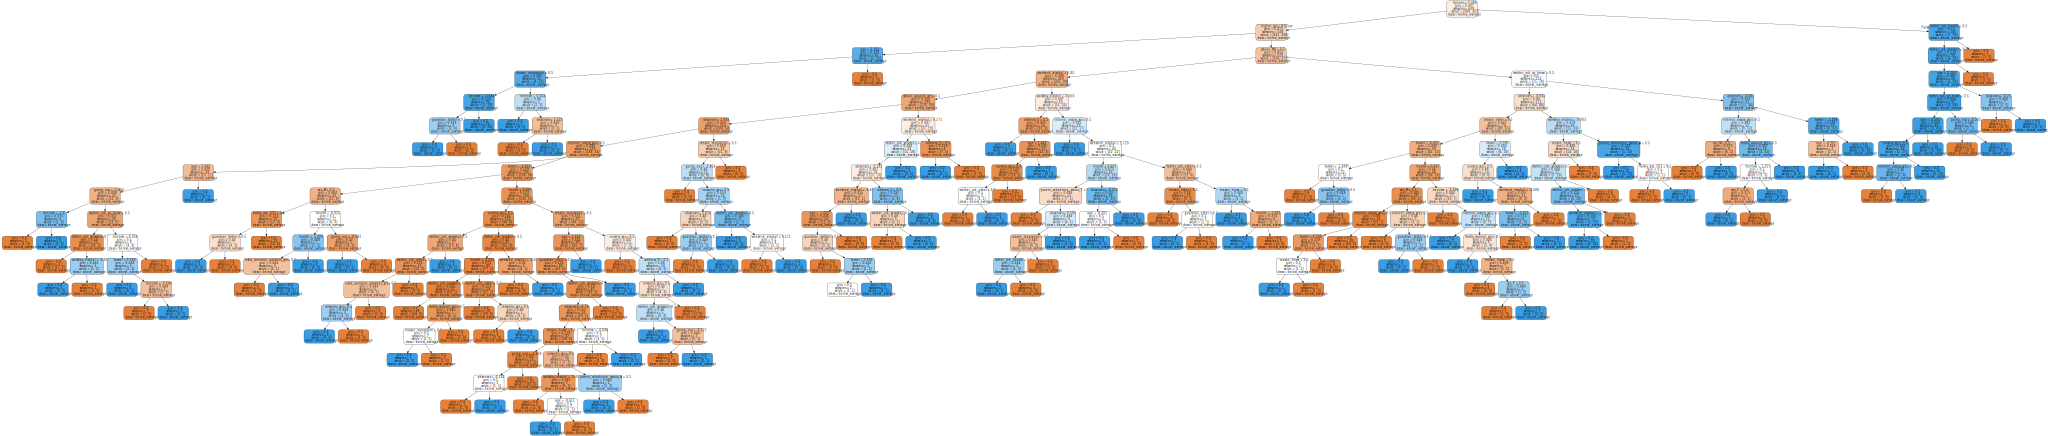

In [267]:
from sklearn.tree import export_graphviz
import graphviz
from graphviz import Source

dot_data = export_graphviz(clf, out_file=None, feature_names=sc, class_names=labels, filled=True, rounded=True, special_characters=True)
graph.render("decision_tree")   # save the plot to a file called "decision_tree.pdf"
graph.render("decision_tree")   # save the plot to a file called "decision_tree.pdf"
graph = graphviz.Source(dot_data)  
graph.format = 'png'
graph.render('decision_tree', view=True)

graph